In [1]:
import AnnotatedvcfParser as vcf
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
vcf_file_path = "/home/yabili/results/06_cosmic_annotation/Mutect2_filtered_HKNPC-090T_vs_HKNPC-090N_cosmic_annotation.vcf"
vcf_file=open(vcf_file_path, "r" )
vcfFile = vcf.readVCF(vcf_file)
vcfFileTranslisted = vcf.transcipts2ListVepSnpEff(vcfFile, "snpeffANNSplit,VepCSQSplit")
vcfFileTransplitted = vcf.splitransciptsVepSnpEff(vcfFileTranslisted, "VepCSQSplit")
vcfFileTransplittedPipe = vcf.pipe2Col(vcf_file, vcfFileTransplitted, "VepCSQSplit")

In [3]:
vcfFileTransplittedPipe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920 entries, 0 to 8919
Data columns (total 188 columns):
 #    Column                       Dtype 
---   ------                       ----- 
 0    CHROM                        object
 1    POS                          object
 2    ID                           object
 3    REF                          object
 4    ALT                          object
 5    QUAL                         object
 6    FILTER                       object
 7    INFO                         object
 8    FORMAT                       object
 9    HKNPC-090N                   object
 10   HKNPC-090T                   object
 11   AS_FilterStatus              object
 12   AS_SB_TABLE                  object
 13   AS_UNIQ_ALT_READ_COUNT       object
 14   CONTQ                        object
 15   DP                           object
 16   ECNT                         object
 17   GERMQ                        object
 18   MBQ                          object
 19   MFRL

In [4]:
#REFERENCE: https://www.alpharithms.com/fix-a-missing-value-in-pandas-dataframe-334915/
vcfFileTransplittedPipe.replace(".", "NA", inplace=True)
vcfFileTransplittedPipe.replace("", "NA", inplace=True)
vcfFileTransplittedPipe.replace("NA", np.nan, inplace=True)

In [5]:
vcfFileTransplittedPipe["MOTIF_SCORE_CHANGE"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8915    NaN
8916    NaN
8917    NaN
8918    NaN
8919    NaN
Name: MOTIF_SCORE_CHANGE, Length: 8920, dtype: object

In [6]:
vcfFileTransplittedPipe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920 entries, 0 to 8919
Data columns (total 188 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    CHROM                        object 
 1    POS                          object 
 2    ID                           object 
 3    REF                          object 
 4    ALT                          object 
 5    QUAL                         float64
 6    FILTER                       object 
 7    INFO                         object 
 8    FORMAT                       object 
 9    HKNPC-090N                   object 
 10   HKNPC-090T                   object 
 11   AS_FilterStatus              object 
 12   AS_SB_TABLE                  object 
 13   AS_UNIQ_ALT_READ_COUNT       float64
 14   CONTQ                        float64
 15   DP                           object 
 16   ECNT                         object 
 17   GERMQ                        object 
 18   MBQ                       

In [7]:
a = len(vcfFileTransplittedPipe)
vcfFileTransplittedPipe.dropna(axis=1, how='all', inplace=True)

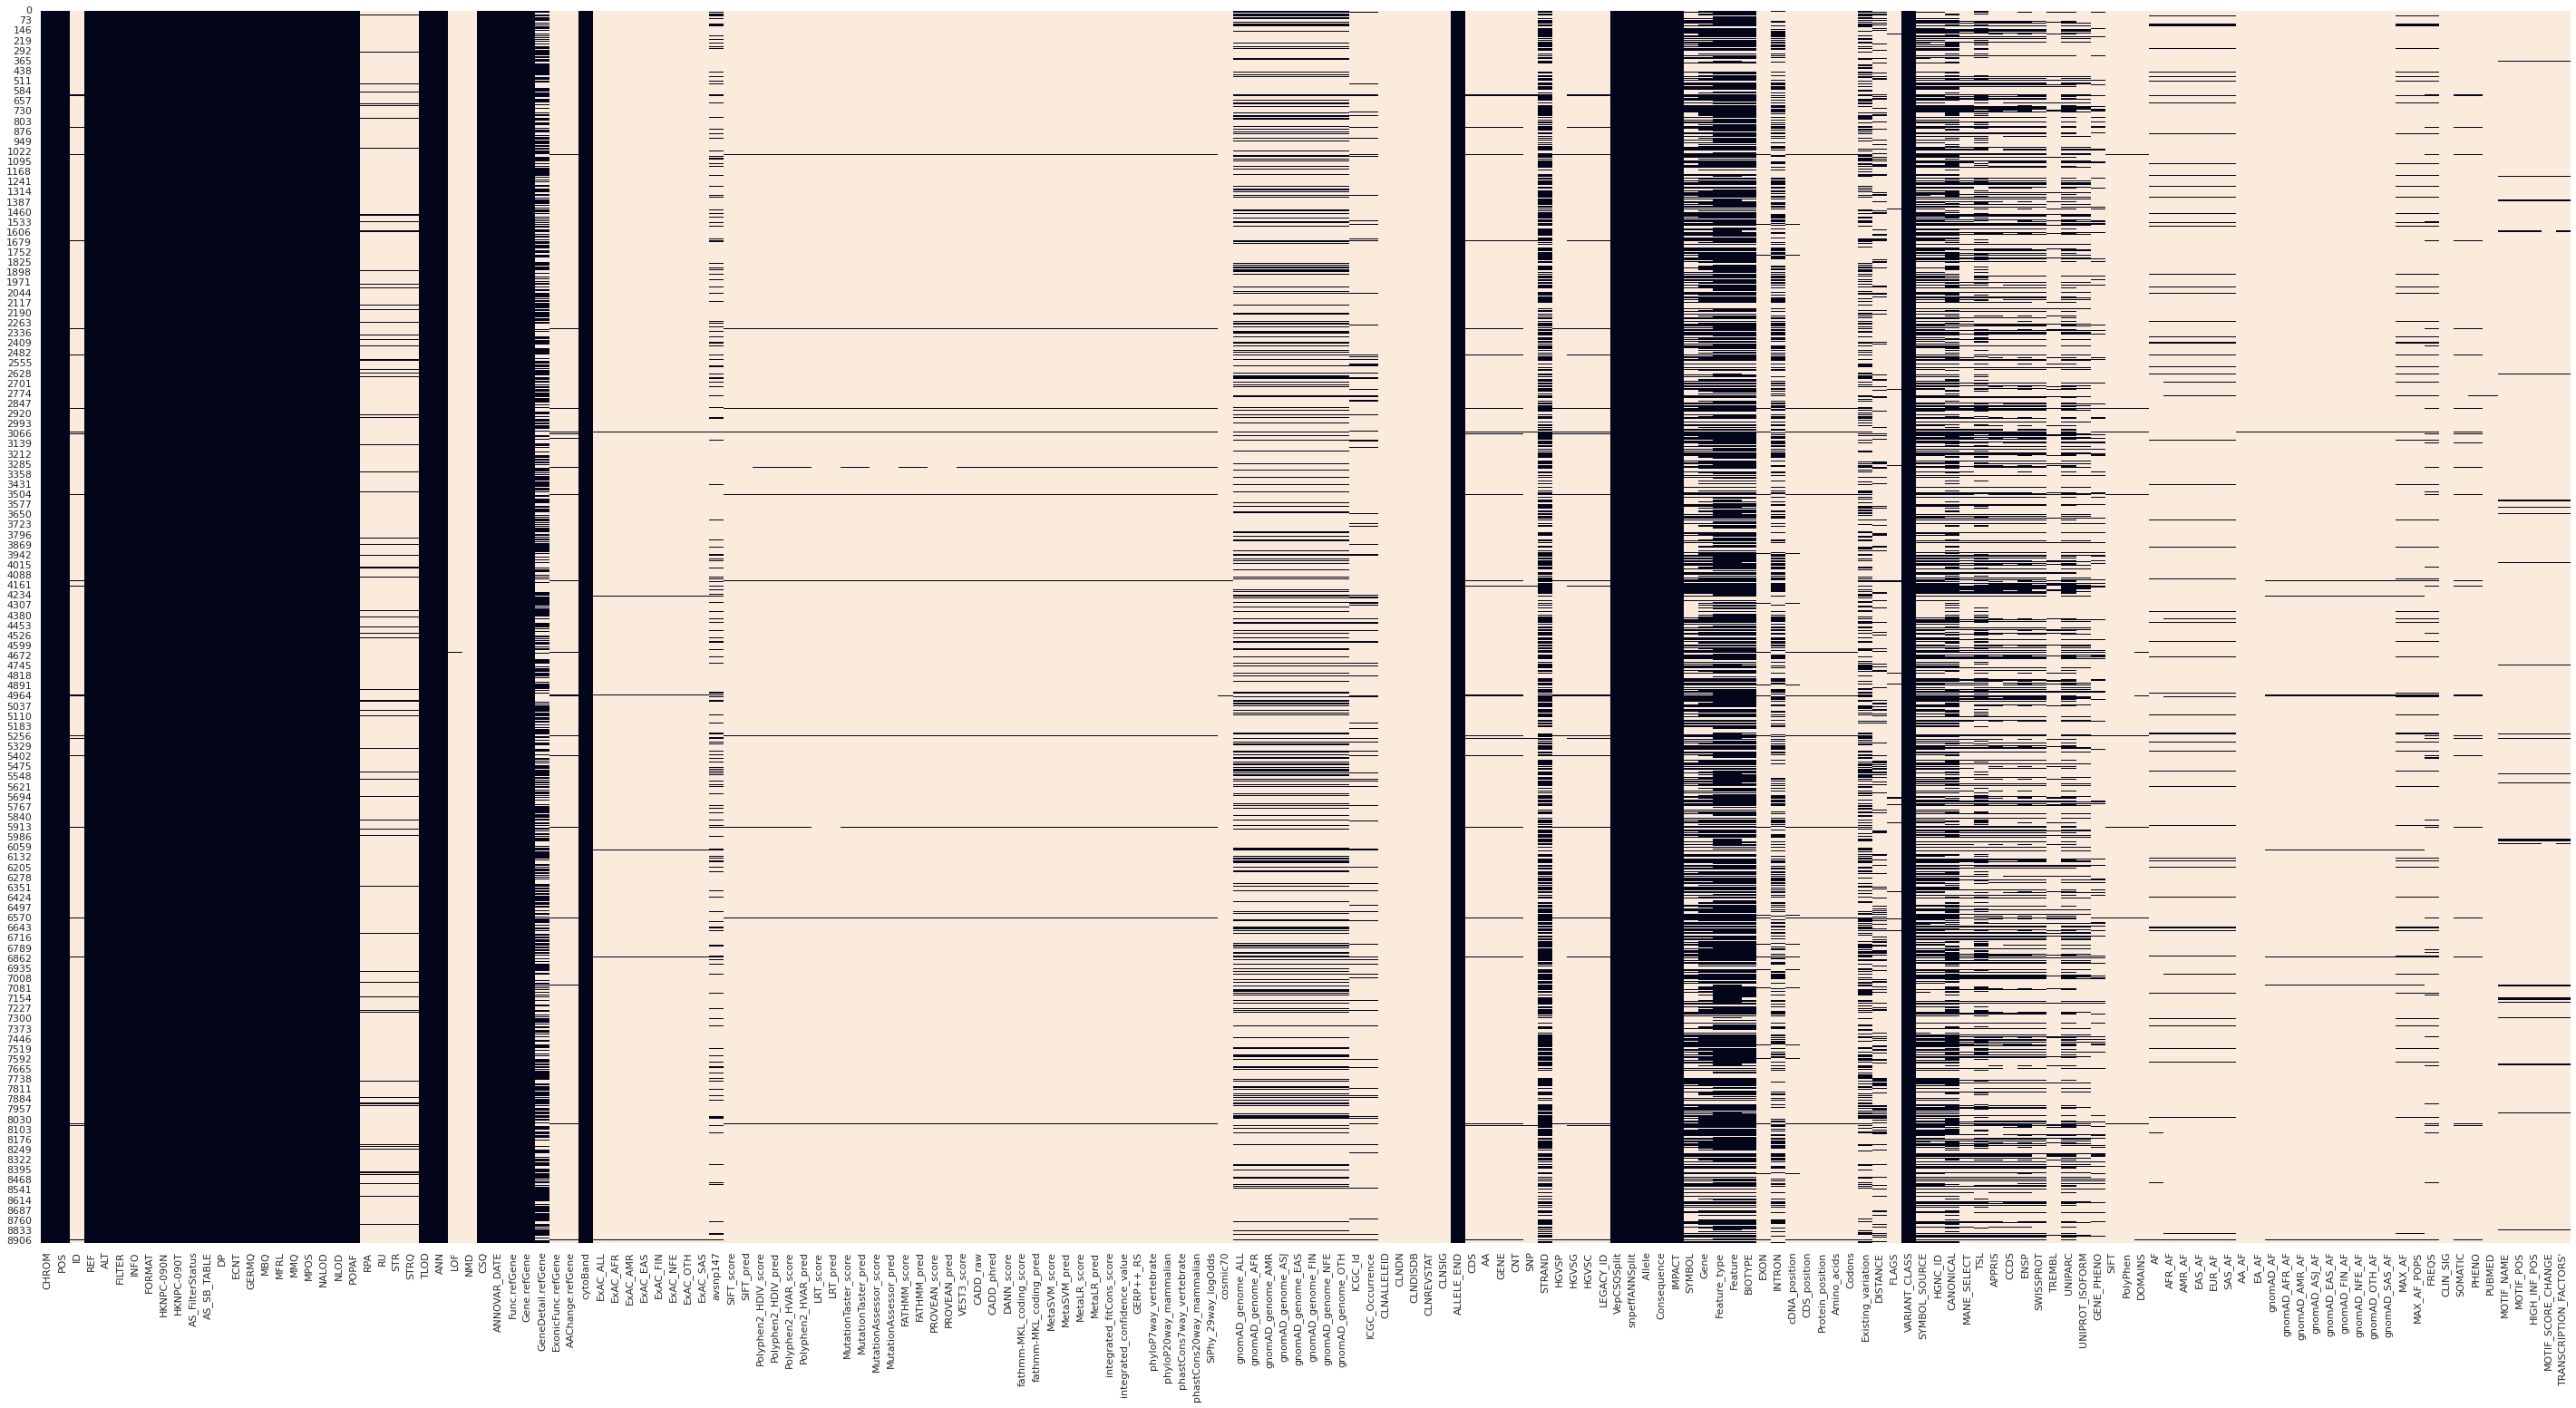

In [8]:
sns.set(rc = {'figure.figsize':(50,25)})
plot = sns.heatmap(vcfFileTransplittedPipe.isnull(), cbar=False)
plot.figure.savefig("output.png")


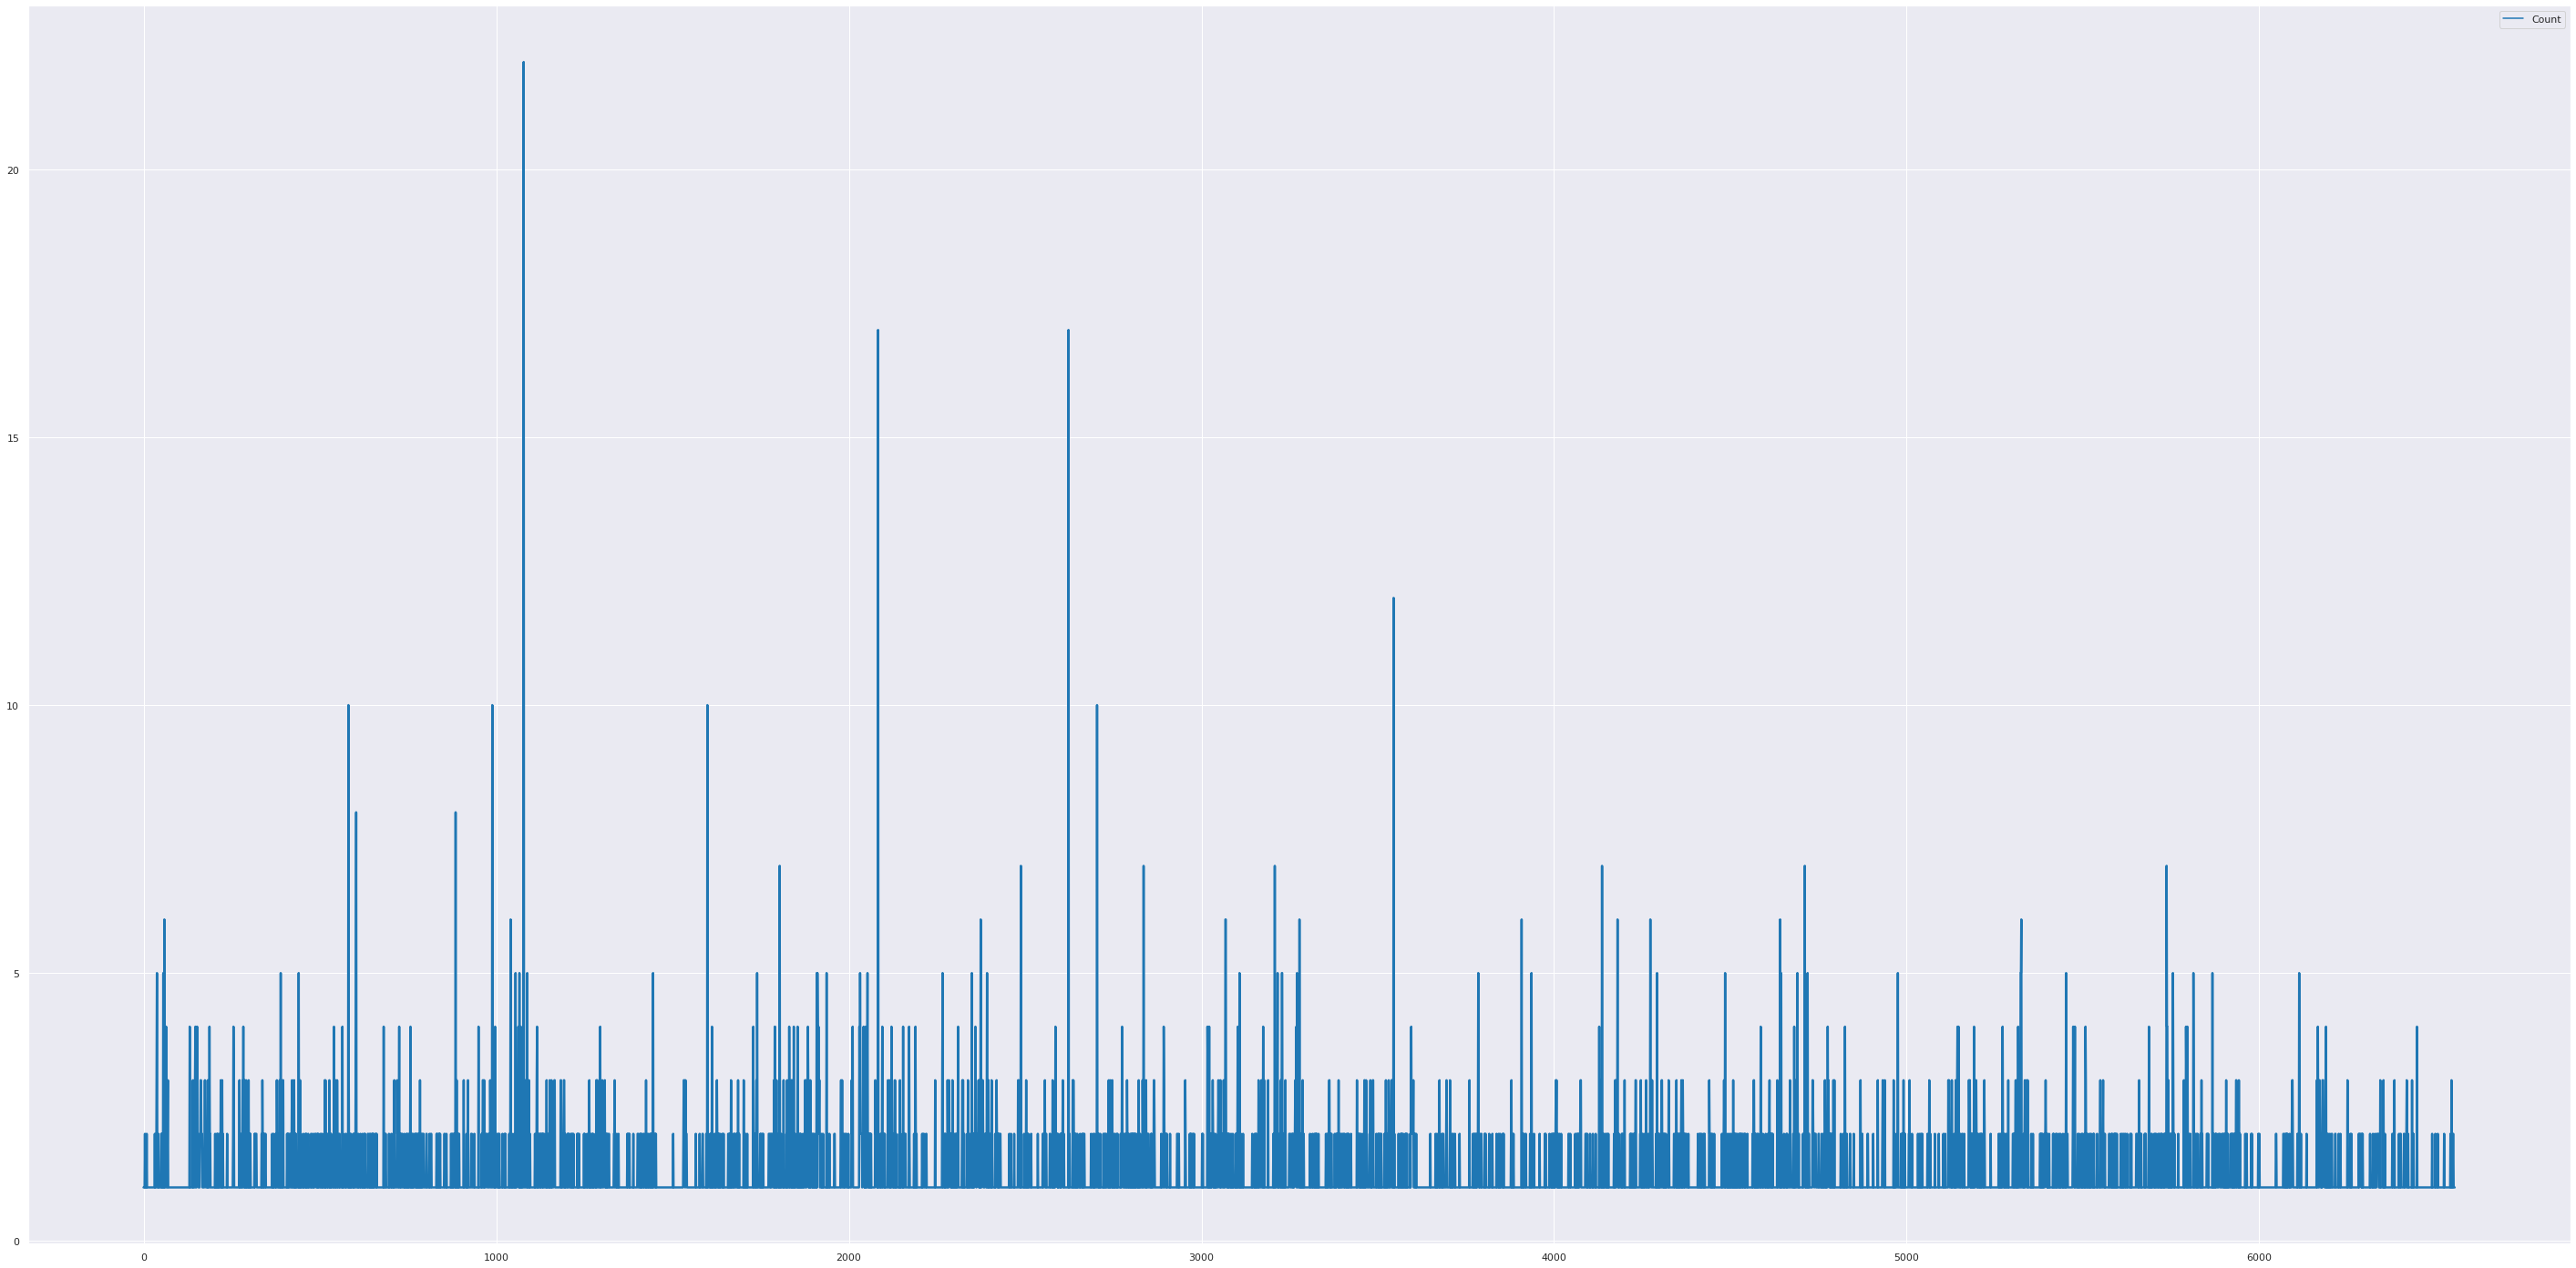

In [9]:
#sns.set(rc = {'figure.figsize':(50,25)})
dup = vcfFileTransplittedPipe[["CHROM", "POS", "REF", "ALT"]].copy()
dup['Count'] = 1
dup2= dup.groupby(["CHROM", "POS", "REF", "ALT"]).Count.count().reset_index()
dup2
#plot = sns.heatmap(dup, cbar=False)
plot2= sns.lineplot(data=dup2, palette="tab10", linewidth=2.5)
plot2.figure.savefig("output2.png")

In [10]:
dup2[dup2["Count"]>10]

,CHROM,POS,REF,ALT,Count
1078,chr12,115000264,C,T,22
2083,chr17,61455340,C,A,17
2623,chr2,196799769,C,T,17
3545,chr3,45818506,TG,T,12


In [11]:
#Reference
pd.set_option('display.max_columns', None)

In [4]:
#chr12 115000264
#vcfFileTransplittedPipe[vcfFileTransplittedPipe["CHROM"] == "chr12" & vcfFileTransplittedPipe.vcfFileTransplittedPipe["POS"] == 115000264]
vcfFileTransplittedPipe[vcfFileTransplittedPipe["CHROM"] == "chr12" ]
vcfFileTransplittedPipe[vcfFileTransplittedPipe["POS"] == "115000264"]

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HKNPC-090N,...,FREQS,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS'
5992,chr12,115000264,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5993,chr12,115000264,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0",...,NaN,NaN,NaN,NaN,NaN,ENSPFM0370,6,Y,-0.075,MEIS1::ELF1
5994,chr12,115000264,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0",...,NaN,NaN,NaN,NaN,NaN,ENSPFM0087,6,Y,-0.112,ELF1&EHF&ELF4&ELF5&ELF3&ELF2
5995,chr12,115000264,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0",...,NaN,NaN,NaN,NaN,NaN,ENSPFM0206,4,Y,-0.093,ETV2::FOXI1&ELK1::FOXI1&ERF::FOXI1&FOXO1::ELK1...
5996,chr12,115000264,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0",...,NaN,NaN,NaN,NaN,NaN,ENSPFM0089,4,Y,-0.137,ELF1&ELF2&ELK1&FLI1&ERG&ETS1&ETV6&FOXO1::ELK3&...
5997,chr12,115000264,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0",...,NaN,NaN,NaN,NaN,NaN,ENSPFM0101,4,Y,-0.088,ELK1::HOXB13&FLI1::HOXB13&HOXB13::ELK1&HOXD12:...
5998,chr12,115000264,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0",...,NaN,NaN,NaN,NaN,NaN,ENSPFM0139,12,Y,-0.082,ETV2::DLX3&HOXB2::ELF1&HOXB2::ELK3
5999,chr12,115000264,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0",...,NaN,NaN,NaN,NaN,NaN,ENSPFM0102,4,Y,-0.069,ELK1::HOXB13&ETV2::HOXB13&ETV5::HOXB13&ETV5::H...
6000,chr12,115000264,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0",...,NaN,NaN,NaN,NaN,NaN,ENSPFM0306,16,Y,-0.076,HOXB2::ELF1
6001,chr12,115000264,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=31,63|8,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:41,0:0.023:41:20,0:17,0:11,30,0,0",...,NaN,NaN,NaN,NaN,NaN,ENSPFM0114,8,Y,-0.164,ETV2::FOXI1&ELK1::FOXI1&ERF::FOXI1&FOXO1::ELF1...


# CALCULATE MUTATIONAL TUMOR BURDEN

# CALCULATE VAF

In [9]:
vcfFileTransplittedPipe


,CHROM,POS,ID,REF,ALT,FILTER,INFO,FORMAT,HKNPC-090N,HKNPC-090T,...,FREQS,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS'
0,chr1,202597,NaN,C,G,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=0,40|0,7;DP=4...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:13,0:0.064:13:6,0:6,0:0,13,0,0","0/1:27,7:0.223:34:15,4:11,3:0,27,0,7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,268438,NaN,C,T,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=167,101|18,11...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:107,0:0.009043:107:53,0:52,0:64,43,0,0","0/1:161,29:0.157:190:69,12:89,17:103,58,18,11",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,268438,NaN,C,T,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=167,101|18,11...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:107,0:0.009043:107:53,0:52,0:64,43,0,0","0/1:161,29:0.157:190:69,12:89,17:103,58,18,11",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,268438,NaN,C,T,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=167,101|18,11...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:107,0:0.009043:107:53,0:52,0:64,43,0,0","0/1:161,29:0.157:190:69,12:89,17:103,58,18,11",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,976515,NaN,TG,T,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=11,52|6,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:27,0:0.034:27:13,0:14,0:3,24,0,0","0/1:36,24:0.403:60:24,7:11,16:8,28,6,18",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8915,chrY,11341909,NaN,T,A,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=5,8|2,2;DP=19...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:9,0:0.075:9:5,0:4,0:2,7,0,0","0/1:4,4:0.503:8:3,1:1,3:3,1,2,2",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8916,chrY,11341909,NaN,T,A,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=5,8|2,2;DP=19...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:9,0:0.075:9:5,0:4,0:2,7,0,0","0/1:4,4:0.503:8:3,1:1,3:3,1,2,2",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8917,chrY,11347131,NaN,G,A,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=22,0|7,0;DP=2...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:8,0:0.1:8:5,0:0,0:8,0,0,0","0/1:14,7:0.333:21:10,3:4,4:14,0,7,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8918,chrY,26437483,NaN,G,A,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=30,7|3,1;DP=4...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:18,0:0.048:18:9,0:9,0:14,4,0,0","0/1:19,4:0.197:23:13,3:6,1:16,3,3,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vcfFileTransplittedPipe

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HKNPC-090N,...,FREQS,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS'
0,chr1,202597,NaN,C,G,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=0,40|0,7;DP=4...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:13,0:0.064:13:6,0:6,0:0,13,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,268438,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=167,101|18,11...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:107,0:0.009043:107:53,0:52,0:64,43,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,268438,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=167,101|18,11...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:107,0:0.009043:107:53,0:52,0:64,43,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,268438,NaN,C,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=167,101|18,11...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:107,0:0.009043:107:53,0:52,0:64,43,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,976515,NaN,TG,T,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=11,52|6,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:27,0:0.034:27:13,0:14,0:3,24,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8915,chrY,11341909,NaN,T,A,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=5,8|2,2;DP=19...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:9,0:0.075:9:5,0:4,0:2,7,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8916,chrY,11341909,NaN,T,A,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=5,8|2,2;DP=19...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:9,0:0.075:9:5,0:4,0:2,7,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8917,chrY,11347131,NaN,G,A,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=22,0|7,0;DP=2...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:8,0:0.1:8:5,0:0,0:8,0,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8918,chrY,26437483,NaN,G,A,NaN,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=30,7|3,1;DP=4...",GT:AD:AF:DP:F1R2:F2R1:SB,"0/0:18,0:0.048:18:9,0:9,0:14,4,0,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#a = vcfFileTransplittedPipe.FORMAT.str.split(':').tolist()
pd.DataFrame(vcfFileTransplittedPipe.FORMAT.str.split(':').values.tolist()).add_prefix('FORMAT_')

,FORMAT_0,FORMAT_1,FORMAT_2,FORMAT_3,FORMAT_4,FORMAT_5,FORMAT_6,FORMAT_7,FORMAT_8,FORMAT_9
0,GT,AD,AF,DP,F1R2,F2R1,SB,None,None,None
1,GT,AD,AF,DP,F1R2,F2R1,SB,None,None,None
2,GT,AD,AF,DP,F1R2,F2R1,SB,None,None,None
3,GT,AD,AF,DP,F1R2,F2R1,SB,None,None,None
4,GT,AD,AF,DP,F1R2,F2R1,SB,None,None,None
...,...,...,...,...,...,...,...,...,...,...
8915,GT,AD,AF,DP,F1R2,F2R1,SB,None,None,None
8916,GT,AD,AF,DP,F1R2,F2R1,SB,None,None,None
8917,GT,AD,AF,DP,F1R2,F2R1,SB,None,None,None
8918,GT,AD,AF,DP,F1R2,F2R1,SB,None,None,None


In [9]:
a

[['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 'DP', 'F1R2', 'F2R1', 'SB'],
 ['GT', 'AD', 'AF', 